## SSAC - Exploration1 - Image Classification : Rock Scissors Paper

In [1]:
# import required packages
from PIL import Image
import os, glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import random

In [2]:

def load_data(img_path):
    # Scissors : 0, Rock : 1, Paper : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(Scissors : 0, Rock : 1, Paper : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # Scissors : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # Rock : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # Paper : 2
        idx=idx+1
        
    print("읽어온 데이터의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

읽어온 데이터의 이미지 개수는 300 입니다.
x_train_norm shape: (300, 28, 28, 3)
y_train shape: (300,)


+ Check if loaded images are matched with correct labels.

Label:  0


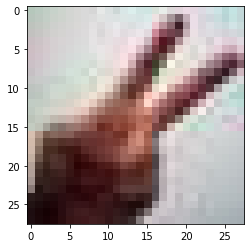

In [6]:
plt.imshow(x_train_norm[30])
print('Label: ', y_train[30])

Label:  1


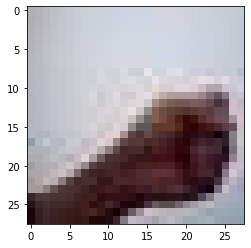

In [4]:
plt.imshow(x_train_norm[130])
print('Label: ', y_train[130])

Label:  2


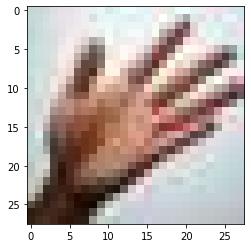

In [5]:
plt.imshow(x_train_norm[230])
print('Label: ', y_train[230])

+ build a train model with keras api

In [7]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3) ))
model.add(keras.layers.MaxPool2D(2,2) )
model.add(keras.layers.Conv2D(64, (3,3), activation='relu') )
model.add(keras.layers.MaxPooling2D(2,2) )
model.add(keras.layers.Flatten() )
model.add(keras.layers.Dense(64, activation='relu') )
model.add(keras.layers.Dense(3, activation='softmax') )

print('Model에 추가된 Layer 개수: ', len(model.layers) )

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (No

In [8]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs = 10)

Epoch 1/10
10/10 [==============================] - 0s 7ms/step - loss: 1.0921 - accuracy: 0.3745
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.8126 - accuracy: 0.7868
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.4312 - accuracy: 0.8756
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1985 - accuracy: 0.9584
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1371 - accuracy: 0.9639
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0634 - accuracy: 0.9820
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0747 - accuracy: 0.9605
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 0.9966


+ load test data set

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

읽어온 데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


Label:  0


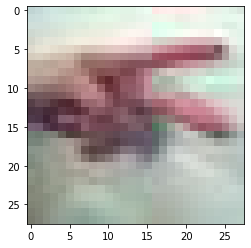

In [10]:
plt.imshow(x_test_norm[30])
print('Label: ', y_test[30])

Label:  1


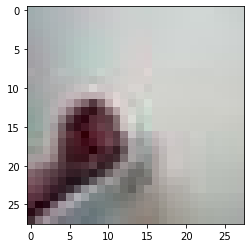

In [11]:
plt.imshow(x_test_norm[130])
print('Label: ', y_test[130])

Label:  2


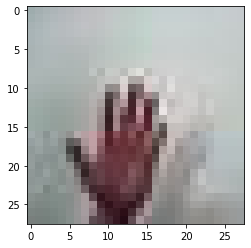

In [12]:
plt.imshow(x_test_norm[230])
print('Label: ', y_test[230])

+ evaluate trained model with test data set

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.5745 - accuracy: 0.4600
test_loss: 1.574472427368164 
test_accuracy: 0.46000000834465027


> traind model shows accuaracy of 0.46.

예측확률분포: [1. 0. 0.]
라벨: 2, 예측결과: 0 인덱스:286


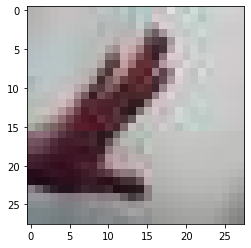

예측확률분포: [1. 0. 0.]
라벨: 2, 예측결과: 0 인덱스:298


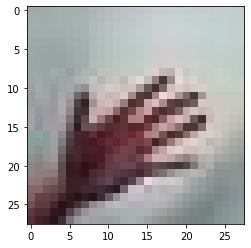

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0 인덱스:174


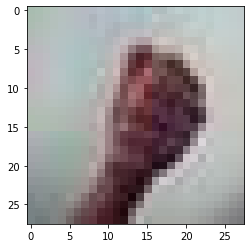

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2 인덱스:7


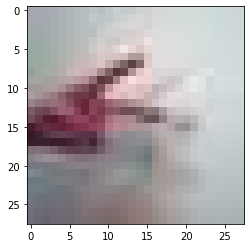

예측확률분포: [1. 0. 0.]
라벨: 2, 예측결과: 0 인덱스:230


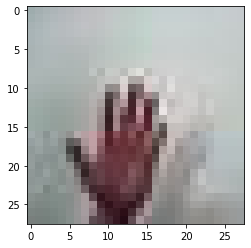

In [14]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_predict_list=[]
for i in range(len(predicted_labels)):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]),"인덱스:"+str(n))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

> trained model seems to be overfitted as training accuracy is capped at 100% then dropped a bit at the last epoch and the trained model gives out wrong answers with 100% certainty.

---

**평가문항	상세기준**
1. 이미지 분류기 모델이 성공적으로 만들어졌는가?   
- 트레이닝이 정상적으로 수행되었음   
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?   
- 데이터셋의 다양성, 정규화 등의 시도가 적절하였음   
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?   
- 60% 이상 도달하였음   

## To improve image classification model

### 1. gather more train data

In [15]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/others/LCH"
(x_train_n1, y_train_n1)=load_data(image_dir_path)
x_train_n1_norm = x_train_n1/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_n1_norm: {}".format(x_train_n1_norm.shape))
print("y_train_n1 shape: {}".format(y_train_n1.shape))

읽어온 데이터의 이미지 개수는 300 입니다.
x_train_n1_norm: (300, 28, 28, 3)
y_train_n1 shape: (300,)


In [16]:
type(x_train_n1_norm)

numpy.ndarray

In [17]:
x_train_big_1 = np.concatenate((x_train_norm, x_train_n1_norm))
y_train_big_1 = np.concatenate((y_train, y_train_n1))
print("x_train_big_1 shape: {}".format(x_train_big_1.shape))
print("y_train_big_1 shape: {}".format(y_train_big_1.shape))

x_train_big_1 shape: (600, 28, 28, 3)
y_train_big_1 shape: (600,)


In [18]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/others/JJK"
(x_train_n2, y_train_n2)=load_data(image_dir_path)
x_train_n2_norm = x_train_n2/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_n2_norm: {}".format(x_train_n2_norm.shape))
print("y_train_n2 shape: {}".format(y_train_n2.shape))

읽어온 데이터의 이미지 개수는 300 입니다.
x_train_n2_norm: (300, 28, 28, 3)
y_train_n2 shape: (300,)


In [19]:
x_train_big_2 = np.concatenate((x_train_big_1, x_train_n2_norm))
y_train_big_2 = np.concatenate((y_train_big_1, y_train_n2))
print("x_train_big_2 shape: {}".format(x_train_big_2.shape))
print("y_train_big_2 shape: {}".format(y_train_big_2.shape))

x_train_big_2 shape: (900, 28, 28, 3)
y_train_big_2 shape: (900,)


In [20]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissors_paper/others/PPH"
(x_train_n3, y_train_n3)=load_data(image_dir_path)
x_train_n3_norm = x_train_n3/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_n3_norm: {}".format(x_train_n3_norm.shape))
print("y_train_n3 shape: {}".format(y_train_n3.shape))

읽어온 데이터의 이미지 개수는 300 입니다.
x_train_n3_norm: (300, 28, 28, 3)
y_train_n3 shape: (300,)


In [21]:
x_train_big_3 = np.concatenate((x_train_big_2, x_train_n3_norm))
y_train_big_3 = np.concatenate((y_train_big_2, y_train_n3))
print("x_train_big_3 shape: {}".format(x_train_big_3.shape))
print("y_train_big_3 shape: {}".format(y_train_big_3.shape))

x_train_big_3 shape: (1200, 28, 28, 3)
y_train_big_3 shape: (1200,)


+ build and train new model

In [22]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3) ))
model.add(keras.layers.MaxPool2D(2,2) )
model.add(keras.layers.Conv2D(64, (3,3), activation='relu') )
model.add(keras.layers.MaxPooling2D(2,2) )
model.add(keras.layers.Flatten() )
model.add(keras.layers.Dense(64, activation='relu') )
model.add(keras.layers.Dense(3, activation='softmax') )

print('Model에 추가된 Layer 개수: ', len(model.layers) )

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (

In [23]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_big_3, y_train_big_3, epochs = 10)

Epoch 1/10
38/38 [==============================] - 1s 6ms/step - loss: 1.0850 - accuracy: 0.4685
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.8004 - accuracy: 0.6206
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.5964 - accuracy: 0.7614
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.4301 - accuracy: 0.8350
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3756 - accuracy: 0.8670
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2790 - accuracy: 0.8988
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1743 - accuracy: 0.9428
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1466 - accuracy: 0.9587
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1033 - accuracy: 0.9765
Epoch 10/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0870 - accuracy: 0.9778


+ loss decreased gradually and reached 0.0870 while accuracy increased constantly and achieved 0.9778. It seems 7 layer model with given hyper parameter can handle the task. 

In [24]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4741 - accuracy: 0.4833
test_loss: 1.4740749597549438 
test_accuracy: 0.4833333194255829


+ yet test shows relatively low accuracy of 0.48 ; cannot pass the given criteria of 0.6

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2 인덱스:47


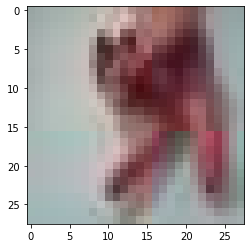

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0 인덱스:119


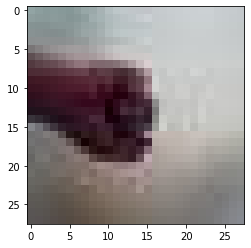

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0 인덱스:186


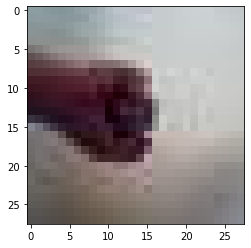

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0 인덱스:181


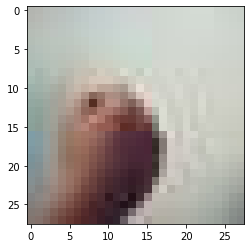

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2 인덱스:114


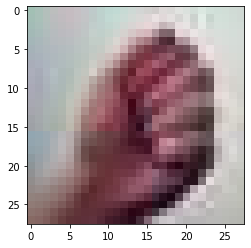

In [25]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_predict_list=[]
for i in range(len(predicted_labels)):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]),"인덱스:"+str(n))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

---

**Foundings**
+ train data may have confusing defromed pictures of rock, scissors and paper.
+ train data may not have enough rotated pictures of rock, scissors and paper.

**Thoghts**
+ searching through a big pile of pictures for some deformed pictures that may or may not exist is an exhausting and time-consuming task.
+ rotate picutres first then see what happens.

---

### ~2. Rotate Pictures~

In [62]:
sample = x_train_big_3[10:12]

In [63]:
sample.shape

(2, 28, 28, 3)

In [64]:
sample_ro9 = np.rot90(sample)

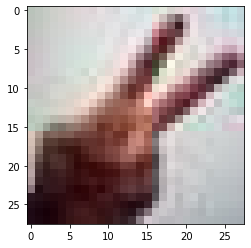

In [65]:
plt.imshow(sample[0], cmap=plt.cm.binary)
#plt.imshow(sample_ro9[0], cmap=plt.cm.binary)
plt.show()

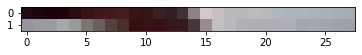

In [66]:
plt.imshow(sample_ro9[0], cmap=plt.cm.binary)

**Thoughts**
+ `numpy.rot90()` does not work as I anticipated on 4d array. I need to reduce channel then rotate

---

### 2. average RGB channel

+ Since it is a rather simple task to classify rock, scissors and paper, it is safe to say that color is less important than shape. I assumed feeding average value of 3 RGB channel values to a model would make a model to focus more on the shape features than on the color values.

In [36]:
sample = x_train_big_3[120:122]

In [37]:
sample.shape

(2, 28, 28, 3)

In [38]:
sample_gray = np.average(sample, axis=-1)

In [39]:
sample_gray.shape

(2, 28, 28)

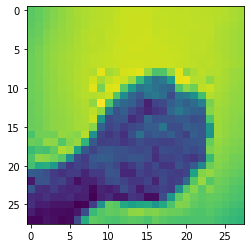

In [40]:
plt.imshow(sample_gray[1])
plt.show()

+ It is not the result I expected but it seems enough to achieve my goal to reduce 3 channels to 1.

In [41]:
x_train_big_1ch = np.average(x_train_big_3, axis=-1)
x_test_1ch = np.average(x_test_norm, axis=-1)

In [42]:
x_train_big_1ch.shape

(1200, 28, 28)

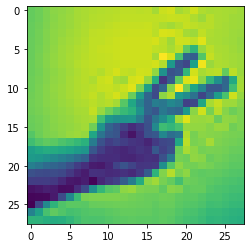

In [43]:
plt.imshow(x_train_big_1ch[1])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

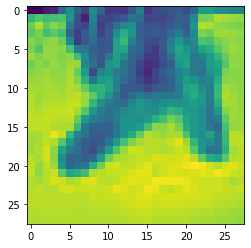

In [44]:
plt.imshow(x_test_1ch[1])
plt.show

In [45]:
x_train_big_1ch_reshaped = x_train_big_1ch.reshape( -1, 28, 28, 1)
x_test_1ch_reshaped = x_test_1ch.reshape(-1, 28, 28, 1)

+ build and train new model

In [49]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))
model.add(keras.layers.MaxPool2D(2,2) )
model.add(keras.layers.Conv2D(64, (3,3), activation='relu') )
model.add(keras.layers.MaxPooling2D(2,2) )
model.add(keras.layers.Flatten() )
model.add(keras.layers.Dense(64, activation='relu') )
model.add(keras.layers.Dense(3, activation='softmax') )

print('Model에 추가된 Layer 개수: ', len(model.layers) )

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (

In [50]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_big_1ch_reshaped, y_train_big_3, epochs = 10)

Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 1.0836 - accuracy: 0.4046
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.8560 - accuracy: 0.6091
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6495 - accuracy: 0.7446
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.5209 - accuracy: 0.7817
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.4539 - accuracy: 0.8312
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.3486 - accuracy: 0.8905
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.2871 - accuracy: 0.8832
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2085 - accuracy: 0.9405
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2119 - accuracy: 0.9330
Epoch 10/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1569 - accuracy: 0.9525


In [51]:
test_loss, test_accuracy = model.evaluate(x_test_1ch_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4674 - accuracy: 0.5267
test_loss: 1.4674243927001953 
test_accuracy: 0.5266666412353516


+ test accuracy increased by 0.04 ; 0.08 to go.

예측확률분포: [0.21765354 0.73696697 0.04537945]
라벨: 2, 예측결과: 1 인덱스:234


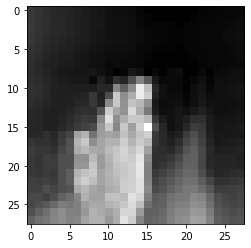

예측확률분포: [0.3232019  0.67133397 0.00546415]
라벨: 2, 예측결과: 1 인덱스:203


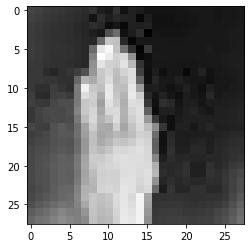

예측확률분포: [0.28641087 0.0358096  0.6777795 ]
라벨: 0, 예측결과: 2 인덱스:97


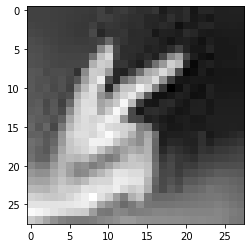

예측확률분포: [0.03686065 0.00794068 0.95519865]
라벨: 0, 예측결과: 2 인덱스:51


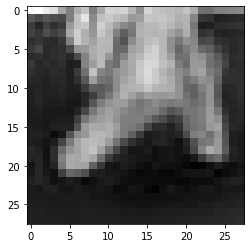

예측확률분포: [0.88390124 0.0276273  0.08847154]
라벨: 2, 예측결과: 0 인덱스:232


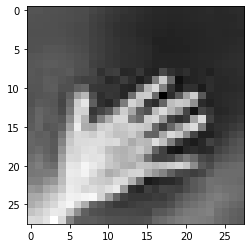

In [52]:
predicted_result = model.predict(x_test_1ch_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_predict_list=[]
for i in range(len(predicted_labels)):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]),"인덱스:"+str(n))
    plt.imshow(x_test_1ch[n], cmap=plt.cm.binary)
    plt.show()

+ trained model seems to be somewhat confused in wrong answers compared to previous models.

---

### Rotate image

+ practice with sample

In [73]:
sample = x_train_big_1ch[100]

In [74]:
sample.shape

(28, 28)

In [75]:
sample_ro9 = np.rot90(sample)

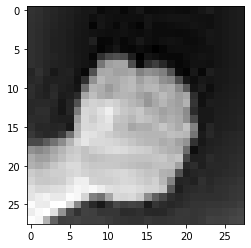

In [78]:
plt.imshow(sample, cmap=plt.cm.binary)

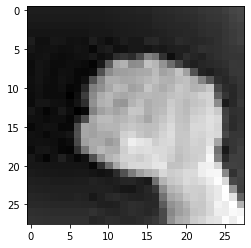

In [77]:
plt.imshow(sample_ro9, cmap=plt.cm.binary)

In [79]:
sample = x_train_big_1ch[100:103]

In [81]:
sample.shape

(3, 28, 28)

In [91]:
temp = np.rot90(sample[0])

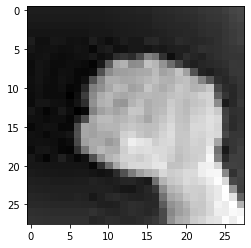

In [92]:
plt.imshow(temp, cmap=plt.cm.binary)

In [93]:
temp.shape

(28, 28)

In [96]:
sample_arr = np.empty([1,28,28])
for i in range(len(sample)):
    temp = np.rot90(sample[i])
    sample_arr = np.append(sample_arr, temp.reshape(1,28,28), axis=0)

In [97]:
sample_arr.shape

(4, 28, 28)

In [100]:
sample = np.delete(sample_arr, [0,0], axis=0)

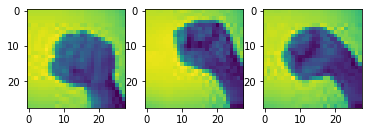

In [102]:
fig=plt.figure()
for i in range(3):
    img = sample[i]
    fig.add_subplot(1, 3, i+1)
    plt.imshow(img)
plt.show()

+ rotate original

In [103]:
x_arr_rotate = np.empty([1,28,28])
for i in range(len(x_train_big_1ch)):
    temp = np.rot90(x_train_big_1ch[i])
    x_arr_rotate = np.append(x_arr_rotate, temp.reshape(1,28,28), axis=0)
x_arr_rotate = np.delete(x_arr_rotate, [0,0], axis=0)    

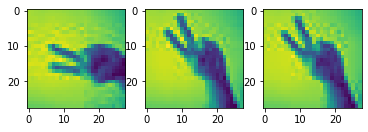

In [104]:
fig=plt.figure()
for i in range(3):
    img = x_arr_rotate[i]
    fig.add_subplot(1, 3, i+1)
    plt.imshow(img)
plt.show()

+ rotate another 90 degree

In [107]:
x_arr_rotate_2 = np.empty([1,28,28])
for i in range(len(x_arr_rotate)):
    temp = np.rot90(x_arr_rotate[i])
    x_arr_rotate_2 = np.append(x_arr_rotate_2, temp.reshape(1,28,28), axis=0)
x_arr_rotate_2 = np.delete(x_arr_rotate_2, [0,0], axis=0)  

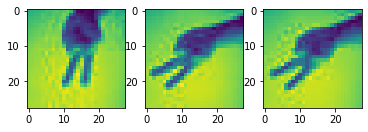

In [108]:
fig=plt.figure()
for i in range(3):
    img = x_arr_rotate_2[i]
    fig.add_subplot(1, 3, i+1)
    plt.imshow(img)
plt.show()

+ merge rotated data with original

In [110]:
x_train_aug_1 = np.concatenate((x_train_big_1ch, x_arr_rotate))
y_train_aug_1 = np.concatenate((y_train_big_3, y_train_big_3))
print("x_train_aug_1 shape: {}".format(x_train_aug_1.shape))
print("y_train_aug_1 shape: {}".format(y_train_aug_1.shape))

x_train_aug_1 shape: (2400, 28, 28)
y_train_aug_1 shape: (2400,)


In [111]:
x_train_aug_2 = np.concatenate((x_train_aug_1, x_arr_rotate_2))
y_train_aug_2 = np.concatenate((y_train_aug_1, y_train_big_3))
print("x_train_aug_2 shape: {}".format(x_train_aug_2.shape))
print("y_train_aug_2 shape: {}".format(y_train_aug_2.shape))

x_train_aug_2 shape: (3600, 28, 28)
y_train_aug_2 shape: (3600,)


+ reshape data

In [113]:
x_train_aug_reshaped = x_train_aug_2.reshape( -1, 28, 28, 1)
x_train_aug_reshaped.shape

(3600, 28, 28, 1)

+ bulid and train model

In [117]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))
model.add(keras.layers.MaxPool2D(2,2) )
model.add(keras.layers.Conv2D(64, (3,3), activation='relu') )
model.add(keras.layers.MaxPooling2D(2,2) )
model.add(keras.layers.Flatten() )
model.add(keras.layers.Dense(64, activation='relu') )
model.add(keras.layers.Dense(3, activation='softmax') )

print('Model에 추가된 Layer 개수: ', len(model.layers) )

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (

In [118]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_aug_reshaped, y_train_aug_2, epochs = 10)

Epoch 1/10
113/113 [==============================] - 1s 7ms/step - loss: 1.0401 - accuracy: 0.4333
Epoch 2/10
113/113 [==============================] - 1s 7ms/step - loss: 0.7246 - accuracy: 0.6920
Epoch 3/10
113/113 [==============================] - 1s 7ms/step - loss: 0.4503 - accuracy: 0.8262
Epoch 4/10
113/113 [==============================] - 1s 7ms/step - loss: 0.3318 - accuracy: 0.8797
Epoch 5/10
113/113 [==============================] - 1s 7ms/step - loss: 0.2638 - accuracy: 0.9033
Epoch 6/10
113/113 [==============================] - 1s 7ms/step - loss: 0.2050 - accuracy: 0.9251
Epoch 7/10
113/113 [==============================] - 1s 7ms/step - loss: 0.1765 - accuracy: 0.9372
Epoch 8/10
113/113 [==============================] - 1s 7ms/step - loss: 0.1361 - accuracy: 0.9524
Epoch 9/10
113/113 [==============================] - 1s 7ms/step - loss: 0.1257 - accuracy: 0.9639
Epoch 10/10
113/113 [==============================] - 1s 7ms/step - loss: 0.0915 - accuracy: 0.9719

In [119]:
test_loss, test_accuracy = model.evaluate(x_test_1ch_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.7947 - accuracy: 0.6267
test_loss: 1.7946728467941284 
test_accuracy: 0.6266666650772095


+ passed criteria of 0.6 with 0.62 test accuracy

---

**Thoughts**
+ I am relieved I do not have to look through pile of pictures searching for severly deformed rock, scissors and paper.
+ Need to learn how to manipulate color image
+ Is there another approach to increase test accuracy of image classifier model?